In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
df=pd.read_csv(r"C:/Users/hp/Downloads/Churn_Modelling1.csv")

df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [40]:
new_data=df[['Geography','Gender','Exited']]
new_data.head()

,Geography,Gender,Exited
0,France,Female,1
1,Spain,Female,0
2,France,Female,1
3,France,Female,0
4,Spain,Female,0


<Axes: xlabel='Geography', ylabel='count'>

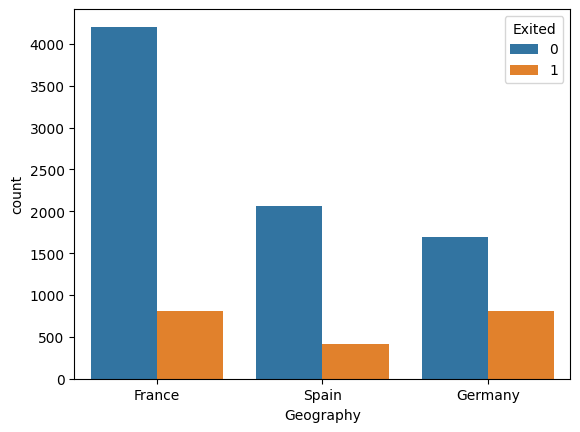

In [41]:
#  IN THIS WE VISUALIZE THE RATE OF EXITS BASED ON GEOGRAPHY AND GENDER
# FIRST METHOD
sns.countplot(x='Geography',hue='Exited',data=new_data)

<Axes: xlabel='Gender', ylabel='count'>

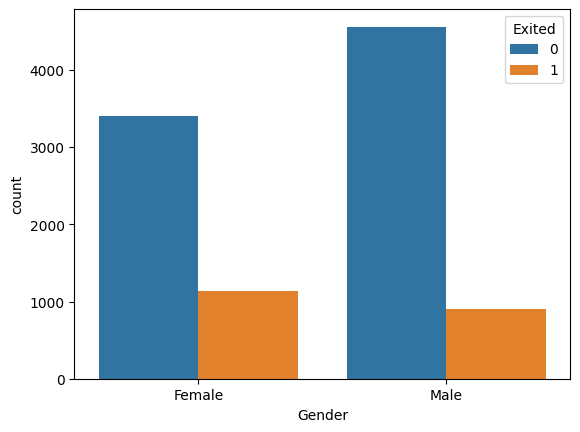

In [42]:
sns.countplot(x='Gender',hue='Exited',data=new_data)


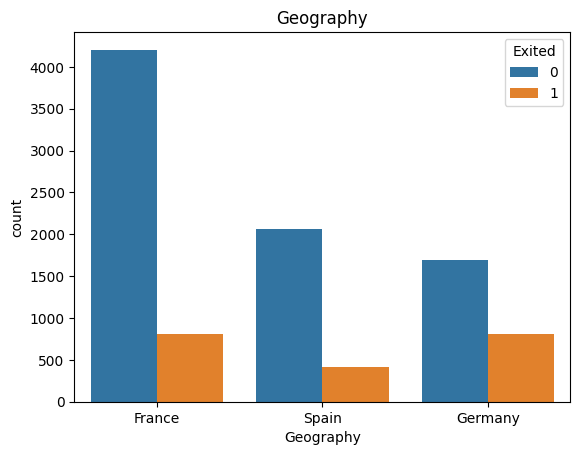

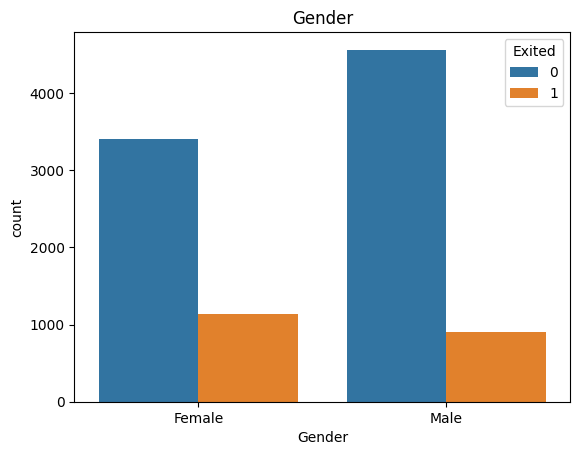

In [43]:
# ANOTHER METHOD
for i,predictor in enumerate(new_data.drop('Exited',axis=1).columns):
    plt.figure(i)
    sns.countplot(x=predictor,hue='Exited',data=new_data)
    plt.title(predictor)
    plt.show()

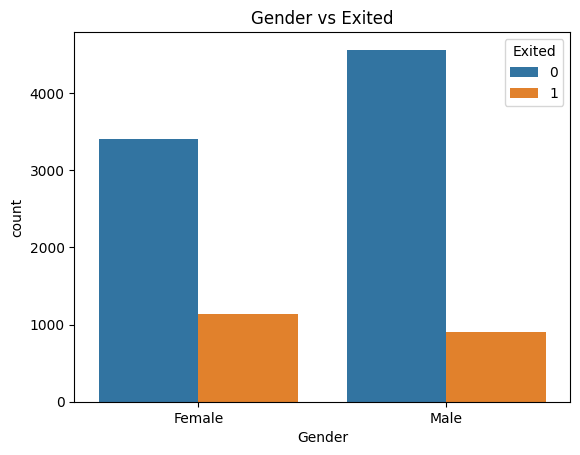

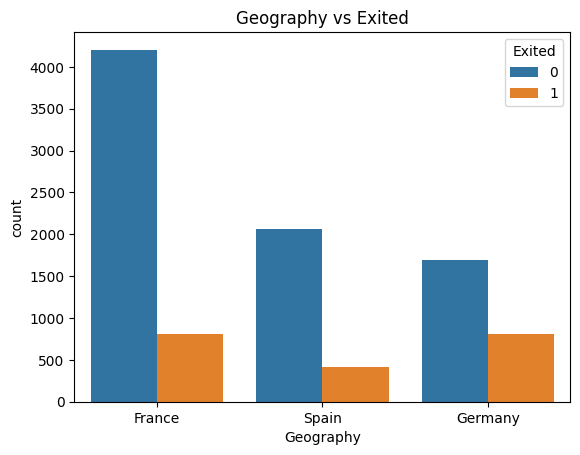

In [44]:
#  ANOTHER WAY TO PLOT
categorical_cols = ['Gender', 'Geography']

for col in categorical_cols:
    sns.countplot(x=col, hue='Exited', data=new_data)
    plt.title(f"{col} vs Exited")
    plt.show()


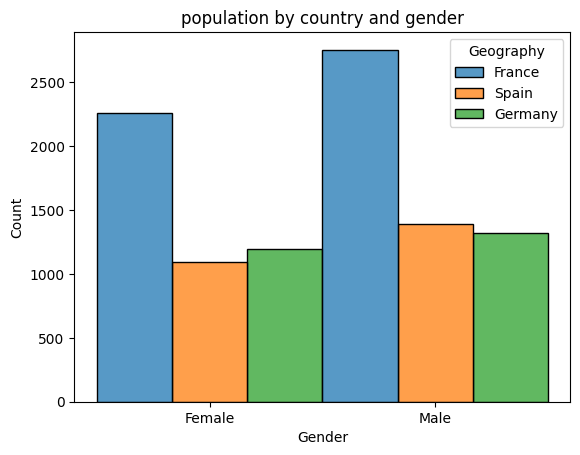

In [45]:
# UPPER METHODS FOR UNIVARIATE ANALYSIS
# BELOW METHODS FOR BIVARIATE ANALYSIS
sns.histplot(x='Gender', data=new_data, hue='Geography', stat="count", multiple='dodge')
plt.title('population by country and gender')
plt.show()


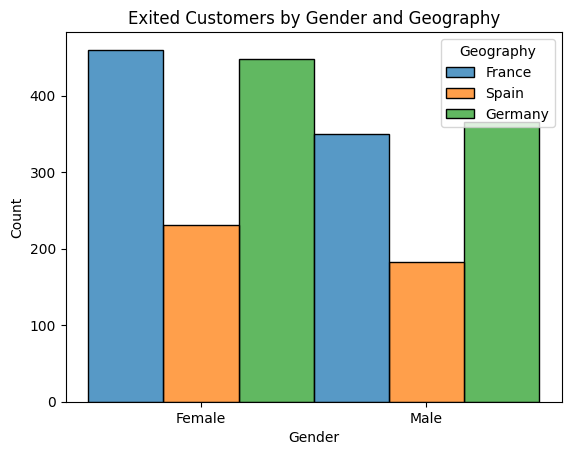

In [46]:
new_data_target = new_data.loc[new_data['Exited'] == 1]
sns.histplot(x='Gender', data=new_data_target, hue='Geography', stat="count", multiple='dodge')
plt.title('Exited Customers by Gender and Geography')
plt.show()

In [47]:
df.select_dtypes(include=[np.number]).corr()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004202,0.005840,0.000783,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
CustomerId,0.004202,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005840,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.000783,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.006495,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.009067,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.007246,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,0.000599,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.012044,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


<Axes: >

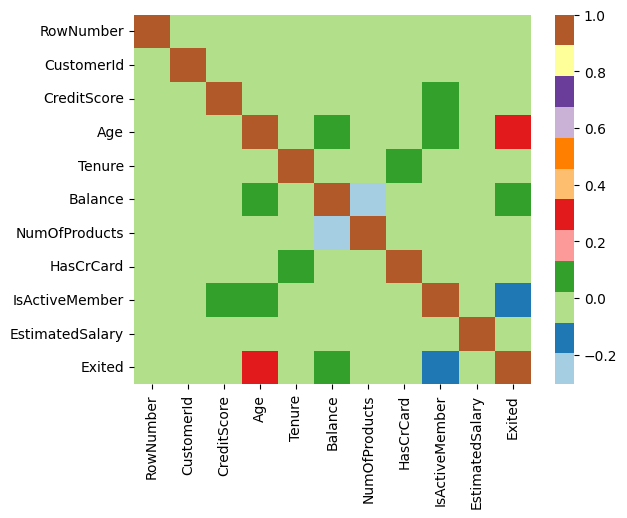

In [55]:
sns.heatmap(df.select_dtypes(include=[np.number]).corr(), cmap='Paired')